In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
data = pd.read_csv("delivery_time.csv")

In [21]:
data.head() 

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.rename({"Delivery Time":"deliverytime","Sorting Time":"sortingtime"},inplace=True,axis=1)

In [6]:
data.describe()

,deliverytime,sortingtime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   deliverytime  21 non-null     float64
 1   sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.isnull().sum()

deliverytime    0
sortingtime     0
dtype: int64

<Axes: >

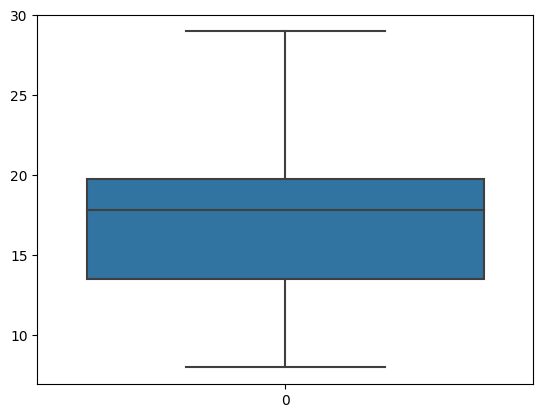

In [9]:
sns.boxplot(data['deliverytime'])

<Axes: >

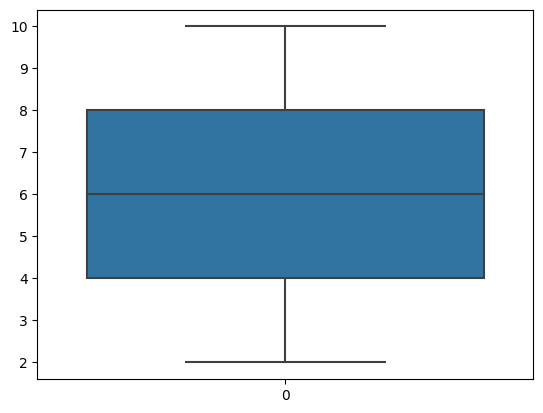

In [10]:
sns.boxplot(data['sortingtime']) 

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

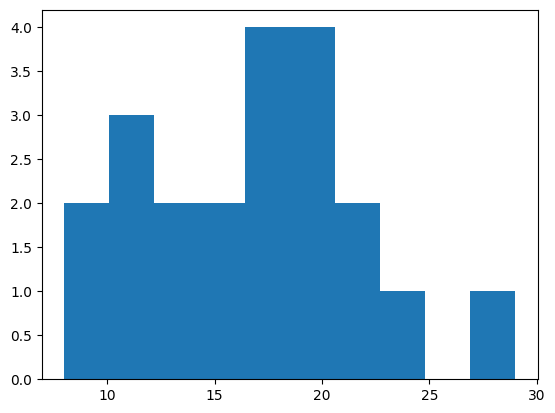

In [11]:
plt.hist(data['deliverytime']) 

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

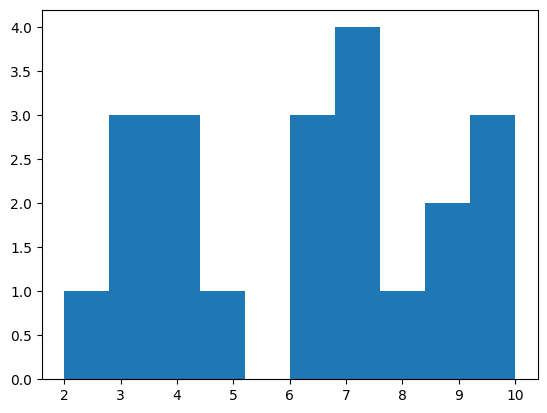

In [12]:
plt.hist(data['sortingtime'])

In [33]:
import statsmodels.formula.api as smf
model_1 = smf.ols("deliverytime~sortingtime",data=data).fit()

In [14]:
model_1.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

<Axes: xlabel='sortingtime', ylabel='deliverytime'>

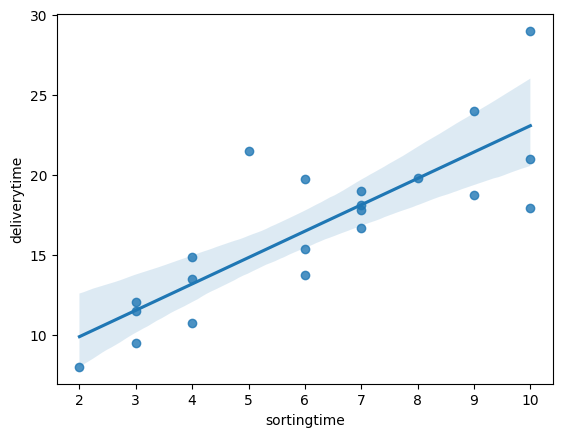

In [15]:
sns.regplot(x='sortingtime',y='deliverytime',data=data)

In [16]:
print(model_1.tvalues,"\n",model_1.pvalues)

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


In [17]:
(model_1.rsquared,model_1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [19]:
#Manual prediction for sorting time 5
delivery_time = (6.582734)+ (1.649020)*(5)
delivery_time 

14.827834

In [42]:
new_data = pd.Series([7,8])
new_data

0    7
1    8
dtype: int64

In [43]:
data_pred = pd.DataFrame(new_data,columns=["sortingtime"]) 
data_pred

,sortingtime
0,7
1,8


In [44]:
#model_1 is giving good accuracy
model_1.predict(data_pred)

0    18.125873
1    19.774893
dtype: float64

In [ ]:
#Q2 Salary_hike

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf 

In [46]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [49]:
dataset= pd.read_csv("Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [52]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

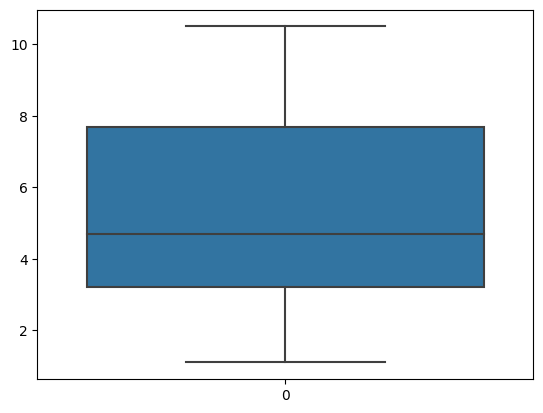

In [53]:
sns.boxplot(dataset['YearsExperience'])

<Axes: >

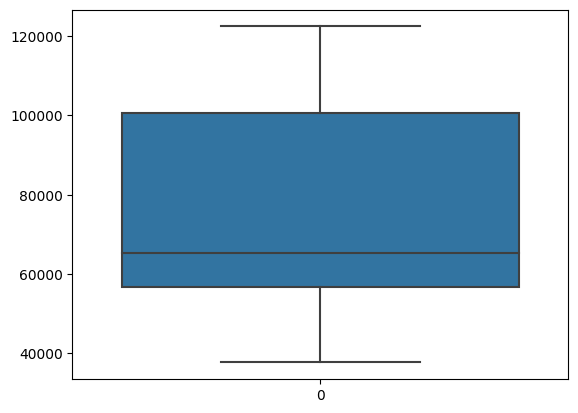

In [54]:
sns.boxplot(dataset['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Count'>

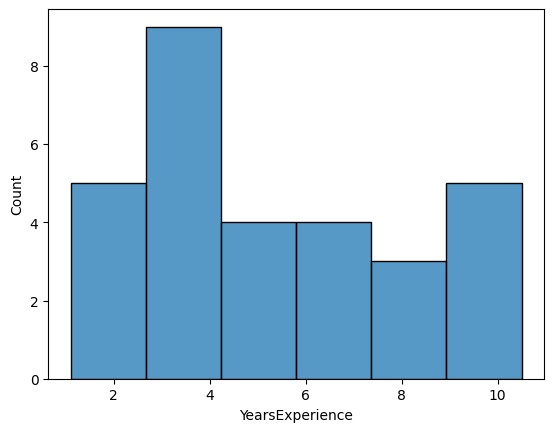

In [55]:
sns.histplot(dataset['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Count'>

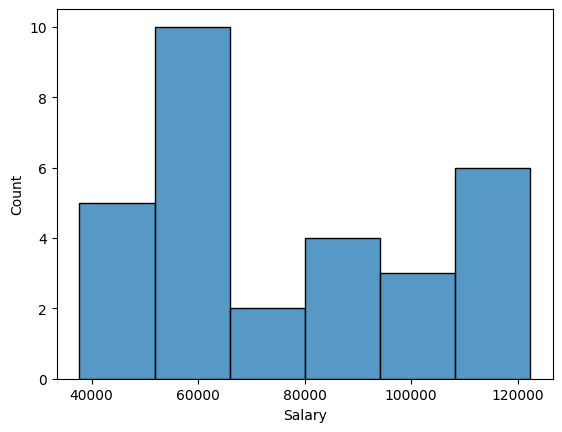

In [56]:
sns.histplot(dataset['Salary'])

In [57]:
#Coorelation Analysis
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

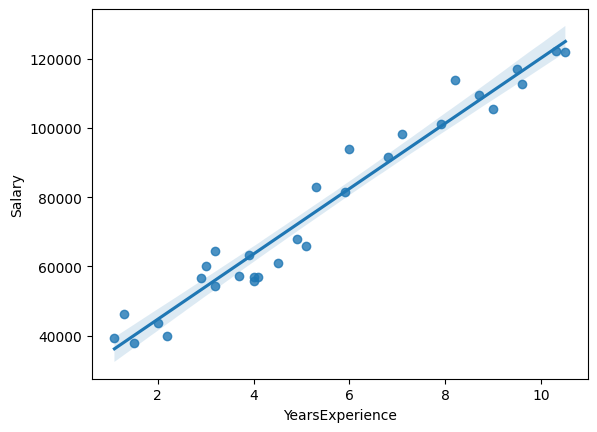

In [60]:
sns.regplot(x='YearsExperience',y='Salary',data=dataset)

In [63]:
#Model building
import statsmodels.formula.api as smf 
model = smf.ols('Salary~YearsExperience',data=dataset).fit()

In [64]:
#finding parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [65]:
#finding tvalues & pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [66]:
#finding rsquared values
model.rsquared, model.rsquared_adj 

(0.9569566641435086, 0.9554194021486339)

In [ ]:
#Model prediction for 3 Years Experience

In [68]:
dataset= (25792.200199) + (9449.962321)*3
dataset

54142.087162

In [69]:
newdata = pd.Series([3,5])
newdata

0    3
1    5
dtype: int64

In [70]:
data_pred = pd.DataFrame(newdata,columns=["YearsExperience"])
data_pred

,YearsExperience
0,3
1,5


In [71]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64